## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [534]:
# import libraries in this cell.
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [931]:
# igonre warning settings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read logins.jason file into a dataframe: logins
logins = pd.read_json("logins.json", orient='columns')

# print few records from the df
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# get the basic info about entire dataset
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


There isn't any null or **NaN** values in the dataset. Data type of the column is already datetime. So we are good to process further. <br>
We will have to resample the dataset in 15min time interval and count the number of logins in that time interval and then proceed with the visualization and analysis.

In [4]:
# set column login_time as index
logins = logins.set_index("login_time")

In [5]:
#Create a new column to count the number of logins occurances: count set its value to 1 for each row
logins['count'] = 1

In [6]:
# resmaple the entire dataset with 15min time interval
logins = logins.resample('15T').sum()

# print first few rows to check the data
logins.head(5)

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [7]:
logins.shape

(9788, 1)

Now the number of rows has been redued to 9788 from 93142. Let's plot this entire dataset and look for pattern.

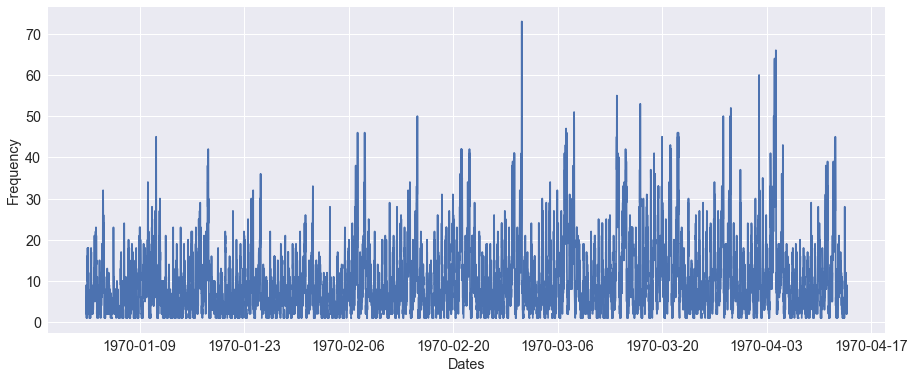

In [17]:
# plot the entire dataset
plt.figure(figsize=(15,6))
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel("Dates", fontsize='large')
plt.ylabel("Frequency", fontsize='large')
plt.plot(logins)
plt.show()

**Intital Findings:** It looks like we have 4 months data avaialable. And there are patterns for sure. In next couple of section we will try to describe the underlying pattern of demands.

Before prociding further let's first define a function **"plot_graph"** to be used for ploting **bar** or **line** graph for this part of the project.

In [504]:
# Function to be used for plotting bar and line: plot_graph
def plot_graph(df, kind, x_label, title):
    ''' This function will be used for plotting line and bar graph'''
    fontsize="large"
    y_label="Count/Frequency"
    figsize=(15, 6)
    if kind=='bar':
        color = 'Accent'
        rotation = 360
        df.plot(kind=kind, figsize=figsize, fontsize=fontsize, colormap=color, rot=rotation)
        plt.xlabel(x_label, fontsize=fontsize)
        plt.ylabel(y_label, fontsize=fontsize)
        plt.title(title, fontsize=fontsize)
        plt.show()
    if kind=="line":
        df.plot(kind=kind, figsize=figsize, fontsize=fontsize)
        plt.xlabel(x_label, fontsize=fontsize)
        plt.ylabel(y_label, fontsize=fontsize)
        plt.title(title, fontsize=fontsize)
        plt.show()
    if kind not in ('line','bar'):
        #print("Something is wrong!")
        print("Something is wrong!\nMake sure to provide 'dataframe', 'kind' as bar or line,label for x axis and title for the plot.")
    return


In [20]:
# create a new dataframe for further analysis: extended_logins and 
# reindex so that we can extract different parts of datetime. For example year, month, days of week.
extended_logins = logins.reset_index()

In [21]:
extended_logins.head()

,login_time,count
0,1970-01-01 20:00:00,2.0
1,1970-01-01 20:15:00,6.0
2,1970-01-01 20:30:00,9.0
3,1970-01-01 20:45:00,7.0
4,1970-01-01 21:00:00,1.0


In [30]:
# extract the month from the login_time column and store it in 'month' column.
extended_logins['month'] = extended_logins['login_time'].apply(lambda x: x.month)

# extract the weekday from the login_time column and store it in 'weekday' column.
extended_logins['weekday'] = extended_logins['login_time'].apply(lambda x: x.weekday_name)

# extract the day of the month from the login_time column and store it in 'month_day' column.
extended_logins['month_day'] = extended_logins['login_time'].apply(lambda x: x.day)

# extract the date from the login_time column and store it in 'date' column.
extended_logins['date'] = extended_logins['login_time'].apply(lambda x: x.date())

# extract the time from the login_time column and store it in 'time' column.
extended_logins['time'] = extended_logins['login_time'].apply(lambda x: x.time())

In [81]:
extended_logins['weekday'] = extended_logins['login_time'].apply(lambda x: x.weekday_name)

In [82]:
# print few rows from new dataframe to make sure we have the data we need
extended_logins.head()

,login_time,count,month,weekday,month_day,date,time
0,1970-01-01 20:00:00,2.0,Jan,Thursday,1,1970-01-01,20:00:00
1,1970-01-01 20:15:00,6.0,Jan,Thursday,1,1970-01-01,20:15:00
2,1970-01-01 20:30:00,9.0,Jan,Thursday,1,1970-01-01,20:30:00
3,1970-01-01 20:45:00,7.0,Jan,Thursday,1,1970-01-01,20:45:00
4,1970-01-01 21:00:00,1.0,Jan,Thursday,1,1970-01-01,21:00:00


In [41]:
extended_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 7 columns):
login_time    9788 non-null datetime64[ns]
count         9381 non-null float64
month         9788 non-null int64
weekday       9788 non-null object
month_day     9788 non-null int64
date          9788 non-null object
time          9788 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 535.4+ KB


In [46]:
# convert all the month number to equivalent month name.# convert 
extended_logins['month'] = extended_logins['month'].apply(lambda x: calendar.month_abbr[x])

In [50]:
# monthly order: month
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
extended_logins['month'] = pd.Categorical(extended_logins['month'], categories=month, ordered=True)

In [51]:
# print 2 rows from the dataset
extended_logins.head(2)

,login_time,count,month,weekday,month_day,date,time
0,1970-01-01 20:00:00,2.0,Jan,Thursday,1,1970-01-01,20:00:00
1,1970-01-01 20:15:00,6.0,Jan,Thursday,1,1970-01-01,20:15:00


In [52]:
# group by months to check the most active month: monthly_logins
monthly_logins = extended_logins.groupby('month')['count'].sum()

In [58]:
# since the months are ordered and will produce extra rows for remaining rows which are not in the 
# dataframe so will drop all the rows which has NaN values.
monthly_logins.dropna(inplace=True)

In [59]:
# print the dataframe
monthly_logins.head(10)

month
Jan    21239.0
Feb    24673.0
Mar    33723.0
Apr    13507.0
Name: count, dtype: float64

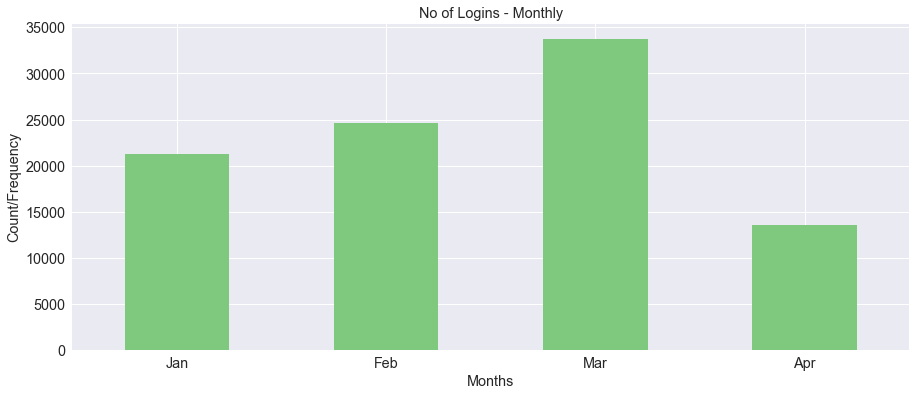

In [487]:
# plot of the above pandas series
plot_graph(monthly_logins, 'bar', 'Months', "No of Logins - Monthly")

Most of the demands occure in the month of March. April has the significantly low amount of counts this is due to the fact that the data avaialble for month of April is only till 15th.<br> 
Let's check the demands on each day of the week. And then we can check the same for each month.

In [84]:
# weekday order: weekday
#weekday = ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun']
weekday = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday','Wednesday']
extended_logins['weekday'] = pd.Categorical(extended_logins['weekday'], 
                                            categories=weekday, ordered=True)

In [85]:
# group by weekday and the corresponding count: weekday_logins
weekday_logins = extended_logins.groupby('weekday')['count'].sum()

In [87]:
# print the weekday demand numbers
weekday_logins.head(7)

weekday
Thursday     11960.0
Friday       15208.0
Saturday     19377.0
Sunday       18167.0
Monday        8823.0
Tuesday       9268.0
Wednesday    10339.0
Name: count, dtype: float64

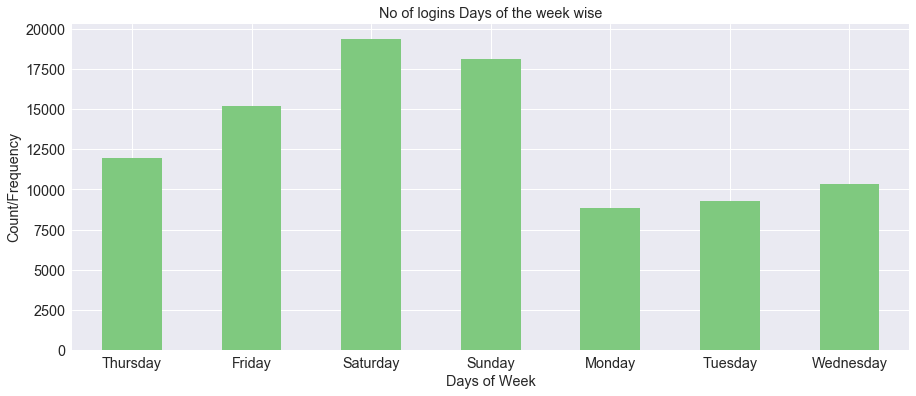

In [488]:
# plot of the above dataframe
plot_graph(weekday_logins, 'bar','Days of Week', 'No of logins Days of the week wise')

As we can see that on weekends the demands are highest, specially on **Saturday**. Monday, Tuesday and Wednesday the demands are relatively lower than the other 4 days of the week.<br> Now Let's see if this pattern is followed for each of the 4 months.

In [451]:
# group by month and day of the week for each month: month_week_logins
month_week_logins = extended_logins.groupby(["month","weekday"])['count'].agg('sum')

In [452]:
# unstack the dataframe for better presentation
month_week_logins = month_week_logins.unstack(level=1)

In [453]:
# print few records of the dataframe
month_week_logins.head()

weekday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday
month,,,,,,,
Jan,2640.0,3907.0,4642.0,3625.0,1926.0,2124.0,2375.0
Feb,3317.0,4092.0,5149.0,4704.0,2355.0,2386.0,2670.0
Mar,4058.0,4696.0,6345.0,7267.0,3532.0,4168.0,3657.0
Apr,1945.0,2513.0,3241.0,2571.0,1010.0,590.0,1637.0


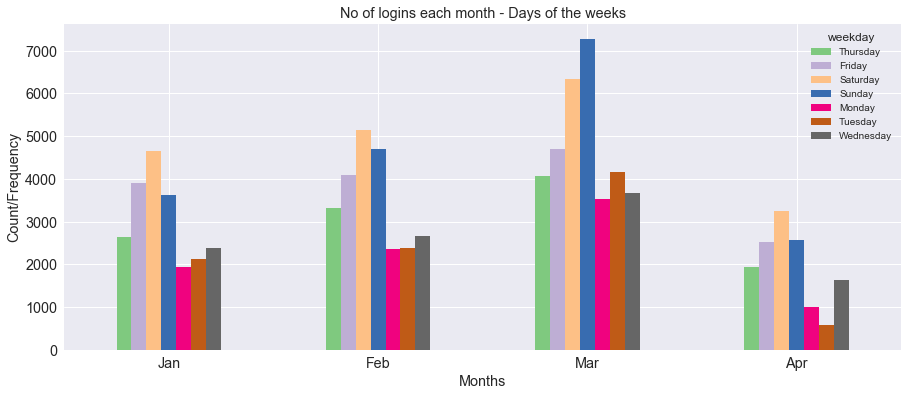

In [486]:
# plot of the above dataframe
plot_graph(month_week_logins, 'bar', "Months", "No of logins each month - Days of the weeks")

As we can see that the demands on **Saturday** has the highest number for all the month except **March**. Interestingly in month of **March** the demands on **Sunday** has the highest numbers. In the month of **April** the demands are lowest on **Tuesday** which is different from other months where the demands are lowest on **Monday**.

In [282]:
# group by each days of the month and month
day_month_logins = extended_logins.groupby(['month','month_day'])['count'].agg('sum')

In [283]:
# unstack to have a better presentation
day_month_logins = day_month_logins.unstack(level=0)

In [284]:
# print first few records
day_month_logins.head()

month,Jan,Feb,Mar,Apr
month_day,,,,
1,112.0,870.0,1273.0,939.0
2,681.0,599.0,637.0,1127.0
3,793.0,464.0,714.0,1504.0
4,788.0,467.0,893.0,1889.0
5,459.0,688.0,914.0,1162.0


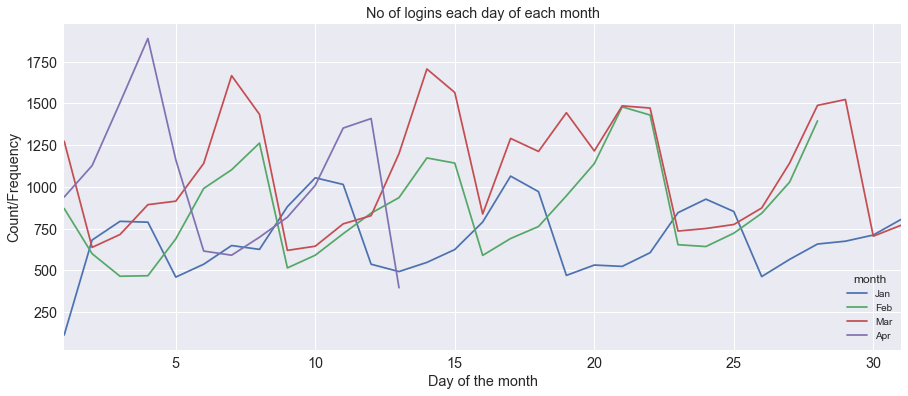

In [485]:
# plot all the 4 month's data as per each day
plot_graph(day_month_logins, 'line', "Day of the month", "No of logins each day of each month")

We can see that the there is no pattern to conclusively determine if the demands were high in the begening or at the end of the month. The high peaks in all the month are the weekends when the demands are really high.

Below is the analysis of part of the day when the demands are highest and lowest. I am going to divide the entire day into 4 periods/part. This division of the day is totaly based of individual's choice.<br>

**I will divide the 24hrs into 4 different period of the day:**<br>
Create a range of the day, i.e. decide hours for morning, afternoon, evening and night. I have dicided the below

05:00 - 11:59 Morning<br>
12:00 - 15:59 Afternoon<br>
16:00 - 19:59 Evening<br>
20:00 - 04:59 Night(nights are long)<br>

In [519]:
# Create a new column "period_of_day" which will store the categorical value of 
#the period of day as specified above.
period = []
for i, row in extended_logins.iterrows():
    if (row[0].hour >= 5) and (row[0].hour < 12):
        period.append('Morning')
        
    if (row[0].hour >=12) and (row[0].hour < 16):
        period.append('Afternoon')
       
    if (row[0].hour >=16) and (row[0].hour < 20):
        period.append('Evening')
        
    if (row[0].hour >=20) & (row[0].hour < 24):
        period.append('Night')
        
    if (row[0].hour ==0) or (row[0].hour < 5):
        period.append('Night')
    
extended_logins['period_of_day'] = pd.DataFrame(period)

In [520]:
# print few recirds to make sure that everything is fine
extended_logins.tail()

,login_time,count,month,weekday,month_day,date,time,period_of_day
9783,1970-04-13 17:45:00,5.0,Apr,Monday,13,1970-04-13,17:45:00,Evening
9784,1970-04-13 18:00:00,5.0,Apr,Monday,13,1970-04-13,18:00:00,Evening
9785,1970-04-13 18:15:00,2.0,Apr,Monday,13,1970-04-13,18:15:00,Evening
9786,1970-04-13 18:30:00,7.0,Apr,Monday,13,1970-04-13,18:30:00,Evening
9787,1970-04-13 18:45:00,6.0,Apr,Monday,13,1970-04-13,18:45:00,Evening


In [522]:
# group by period of the day with number of logins as count: logins_period
logins_period = extended_logins.groupby('period_of_day')['count'].agg('sum')

In [523]:
# print the resultant dataframe/series
logins_period.head()

period_of_day
Afternoon    15039.0
Evening      11631.0
Morning      16106.0
Night        50366.0
Name: count, dtype: float64

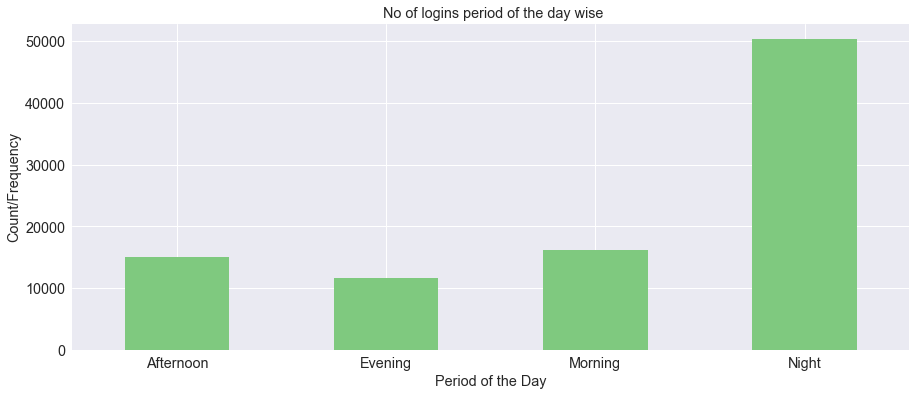

In [524]:
# plot the bar graph 
plot_graph(logins_period, 'bar', "Period of the Day", " No of logins period of the day wise")

As we can see the demands are really high in the **Nights**. **Evenings** has the lowest demands. Now let's try to find it out if the demands are highest in nights only on weekends or this everyday situation.

In [525]:
# create dataframe groupby weekday and period of the day: logins_week_period
logins_week_period = extended_logins.groupby(['weekday', 'period_of_day'])['count'].agg('sum')
logins_week_period.head()

weekday   period_of_day
Thursday  Afternoon        1976.0
          Evening          1217.0
          Morning          2305.0
          Night            6462.0
Friday    Afternoon        2371.0
Name: count, dtype: float64

In [526]:
# unstack the dataframe for better presentation
logins_week_period=logins_week_period.unstack(level=1)
logins_week_period.head()

period_of_day,Afternoon,Evening,Morning,Night
weekday,,,,
Thursday,1976.0,1217.0,2305.0,6462.0
Friday,2371.0,2087.0,2366.0,8384.0
Saturday,2735.0,2681.0,2500.0,11461.0
Sunday,2814.0,2625.0,2511.0,10217.0
Monday,1778.0,1016.0,2206.0,3823.0


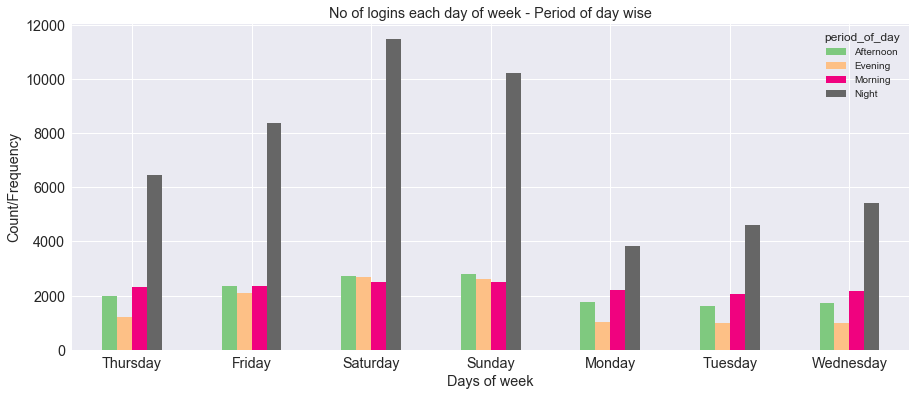

In [527]:
# polt the bar graph
plot_graph(logins_week_period, 'bar', 'Days of week',
           'No of logins each day of week - Period of day wise')

The nights are busy on each day of the week. **Monday, Tuesday, Wednesday and Thursday** have the same pattern, while **Friday, Saturday and Sunday** is bit different in terms of other period of day except **Nights**. 

## Part 2 - Experiment and metrics design ##
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.<br>
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
  1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? <br>
  2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br>
      a. how you will implement the experiment<br>
      b. what statistical test(s) you will conduct to verify the significance of the observation<br>
      c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.<br>

**Solution 1**: I think number of times the partner drivers are crossing the toll bridge on the weekdays would be a good metrics for the measuring the success of this experiment. We can find this numbers as the driver partners will file for reimbursement. Collecting this data is easy and should not require a major change is the system. Once the data is in the system, it is easy to compare the number of times the driver partners used to cross the toll bridge prior to this experiment and after the implementation of the experiment.

**Solution 2:** As mentioned above that we need to collect the data on the number of times the driver partners request for reimbursement. We will count the number of times the drives is taking the trip to the other city on weekdays. Since Ultimate Gotham is most active night time, the drivers from Metropolis should request more number of reimbursement compared to drivers from Gotham and vice versa during day time on weekdays. So we can define the two hypothesis as below:<br>
 $H_0$: There is no increase in the number of times partner drivers accepting trip to other city for which they have to cross the toll bridge.
 $H_1$: There is increase in the number of times partner drivers accepting trip to other city for which they have to cross the toll bridge.

Calculation of Z-score would be the best statical measure of the success as we can esily obtain large sample data(>30) and the standard deviation will be known under normal operation.

The result can be interpreted as confidence interval of 95%, which means that we can conclude with 95% confidence that *there is increase in the number of times partner drivers accepted the trip to other city when they have to cross the toll bridge.* 

One major caveats with this experiment could be the profit in the beginning. Since the Ultimate is paying for the toll cost, hence the profit may go down. But at the same time the number of activity will be increased more rides means more money.

Providing some incentive for the drivers, after completion of some target may encourage drivers to remain active for longer and for doing that they may want to cross the city during which that city is more active. 

## Part 3 ‑ Predictive modeling ##
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you onsidered, and any concerns you have. How valid is your model? Include any key indicators of model performance. 
 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Data description<br>
    ● city: city this user signed up in<br>
    ● phone: primary device for this user<br>
    ● signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
  ● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
  ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
  ● surge_pct: the percent of trips taken with surge multiplier > 1<br>
  ● avg_surge: The average surge multiplier over all of this user’s trips<br>
  ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up<br>
  ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise<br>
  ● weekday_pct: the percent of the user’s trips occurring during a weekday<br>

This analysis and modeling will have 3 parts, **EDA(Exploratory Data Analysis**, **Predictive Modeling** and **Insight and improvement** from the analysis and model.<br>
### EDA ###
Let's start by loading data into a dataframe.

In [535]:
# read file into dataframe: ultimate_df
with open("ultimate_data_challenge.json") as f:
    data = json.load(f)
ultimate_df = pd.DataFrame(data)

# intital look and feel of the dataset
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [536]:
# look at the some meta data and for null values.
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are missing values in the columns **avg_rating_by_driver**, **avg_rating_of_driver** and **phone** columns. Let's take care of these columns first.

In [566]:
columns = list(ultimate_df.columns)
for col in columns:
    if (len(ultimate_df[ultimate_df[col].isnull()] > 0)):
        print("Total number of missing values in {} = {}".format(col, 
                                                    len(ultimate_df[ultimate_df[col].isnull()])))

Total number of missing values in avg_rating_by_driver = 201
Total number of missing values in avg_rating_of_driver = 8122
Total number of missing values in phone = 396


So we have three options here to deal with the missing values.
 1) we can delete the row with nan values. But we may will loose other important observations.
 2) We can fill the nan values with some meaningful values like mean, median, mode etc.
 3) we can fill with the values just before this value or value just after this values.
Now the first two columns avg_rating_by_driver and avg_rating_of_driver are numerical values and the column itself says that its average ratings, hence we can insert mean of these columns in the respective missing values.<br>
For the 3rd column **phone**, total number of missing values is less than 1%, we can simply delete these values but I don't want to miss other important values associated with the these rows. Hence I am gonna create one more category as **unknown** and will see if there is any affect on the kind of device is being used to book the ride.

In [581]:
# filling missing values.
ultimate_df['avg_rating_by_driver'].fillna(round(ultimate_df['avg_rating_by_driver'].mean(),1),
                                           inplace=True)
ultimate_df['avg_rating_of_driver'].fillna(round(ultimate_df['avg_rating_of_driver'].mean(),1),
                                           inplace=True)
ultimate_df['phone'].fillna('Unknown', inplace=True)

In [582]:
# check the info again
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


No more **NaN** or **missing values** in the dataset. However the datatype of columns **signup_date and last_trip_date** are object. We may want to change these to datetime type which will make it simple to work with date type of data. So let's change the dtype of these two columns.

In [583]:
# change dtype of date columns to datetime.
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [584]:
# prin the info to make sure that everything is fine.
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


This concludes our **Data cleaning** part. Now the dataset is in desired format and we will start **EDA**.<br>
First we have to find out retained users. If the user is retained will indicate is with **1** else **0**

In [596]:
# the latest day on which the data was pulled up: latest_day
latest_day = ultimate_df.last_trip_date.max()

# list of 30 days from the latest day: days
days = [latest_day - dt.timedelta(days=x) for x in range(0, 30)]

# add column 'retained' in the dataframe, if the last_trip_date is in the days list the user will
# be retained and value of the column will be 1 else 0.
ultimate_df['retained'] = ultimate_df['last_trip_date'].map(lambda x: int(x in days))

In [597]:
# make sure that the retained column is added
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [602]:
# calculation of percentage of retained users.
retained = 100*(ultimate_df.retained.sum()/ultimate_df.retained.count())
print("{}% users were retained.".format(round(retained, 2)))

36.62% users were retained.


It seems only **36.62%** of users were retaied in last 6 months. Lets try to dig little deeper and find out some insight of the dataset.<br>
We will start with the city. 

In [638]:
ultimate_df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0


In [709]:
ultimate_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

There are 3 cities for which the data is collected in this dataset. Let's find out which city has the more number of users and more number of retained users.

In [710]:
# group by city and count the total number of users and users who used the service in last 30 days.
# these users are stored in column retained.: city_count, city_sum
city_count = (ultimate_df.groupby('city')['retained'].agg('count')).to_frame().reset_index()
city_sum = (ultimate_df.groupby('city')['retained'].agg('sum')).to_frame().reset_index()

In [711]:
# rename the column to more relevant name
city_count.rename(columns={'retained':'Users'}, inplace=True)
city_sum.rename(columns={'retained':'Retained'}, inplace=True)

In [735]:
# merger the two dataframe created above: city
city = pd.merge(city_count, city_sum, on='city')
city.head(3)

,Users,Retained,retained_pct
city,,,
Astapor,16534,4022,24.0
King's Landing,10130,6307,62.0
Winterfell,23336,7981,34.0


In [780]:
# add a column 'retained_pct' as the percentage of users and retained users.
city['retained_pct'] = 100*(city['Retained']/city['Users'])
city['retained_pct'] = city['retained_pct'].apply(lambda x: round(x,2))

In [783]:
# set city as the index for better visualization.
city = city.set_index('city')
city.head()

,Users,Retained,retained_pct
city,,,
Astapor,16534,4022,24.33
King's Landing,10130,6307,62.26
Winterfell,23336,7981,34.20


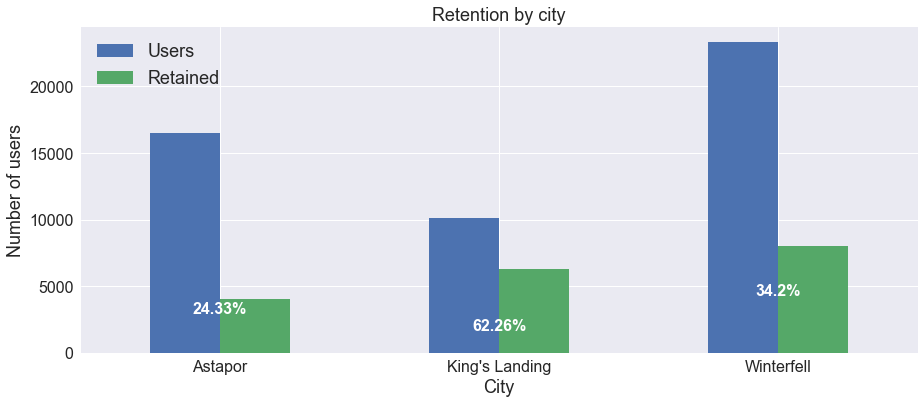

In [784]:
# plot all the 3 cities with the percentage of retained users.
ax = city[['Users','Retained']].plot.bar(
                             legend=False, figsize=(15,6), fontsize=16, rot=360)
labels = []
for j in city.columns:
    if j=='retained_pct':
        for i in city.index:
            label = city.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width, y + height/5, label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="white")
plt.title("Retention by city", fontsize=18 )
plt.xlabel("City", fontsize=18)
plt.ylabel("Number of users", fontsize=18)
plt.legend(fontsize=18)
plt.show()

As we can see, with  **62%** of retained users **King's Landing** city has the highest retention of the users and city of **Astapor** has the lowest retained user with just **24%**. City of **Winterfell** has the highest number of Ultimate users but has very low retained users percentage of **34%**. 

Now we will try to figure out how numch devices(Android or iPhone) affects the retention.

In [739]:
# group by primary phone of the users, count total and retained users: phone_count, phone_sum
phone_count = ultimate_df.groupby("phone")['retained'].agg('count').to_frame().reset_index()
phone_sum = ultimate_df.groupby('phone')['retained'].agg('sum').to_frame().reset_index()

In [740]:
# rename the column to more relevant name
phone_count.rename(columns={'retained':'Users'}, inplace=True)
phone_sum.rename(columns={'retained':'Retained'}, inplace=True)

In [744]:
# merger the two dataframe created above: phone
phone = pd.merge(phone_count, phone_sum, on='phone')
phone.head()

,phone,Users,Retained
0,Android,15022,2942
1,Unknown,396,130
2,iPhone,34582,15238


In [785]:
# add a column 'retained_pct' as the percentage of users and retained users.
phone['retained_pct'] = 100*(phone['Retained']/phone['Users'])
phone['retained_pct'] = phone['retained_pct'].apply(lambda x: round(x,2))
phone.head(2) # make sure we have all the data

,Users,Retained,retained_pct
phone,,,
Android,15022,2942,19.58
Unknown,396,130,32.83


In [747]:
# set phone as the index for better visualization.
phone = phone.set_index('phone')
phone.head()

,Users,Retained,retained_pct
phone,,,
Android,15022,2942,20.0
Unknown,396,130,33.0
iPhone,34582,15238,44.0


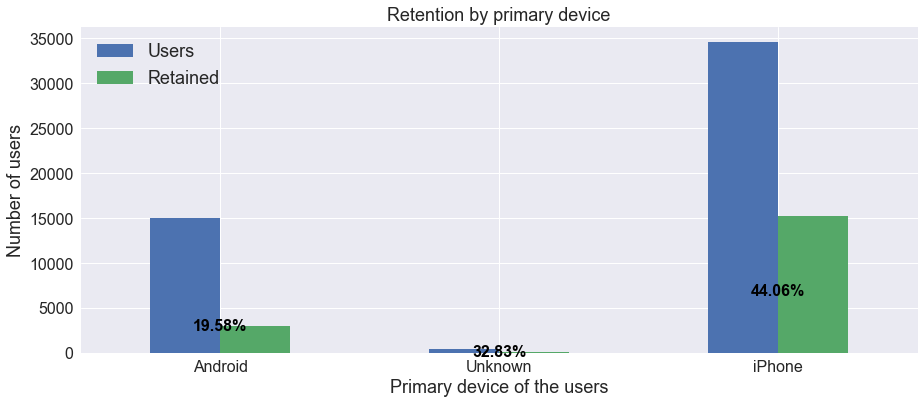

In [786]:
# plot all the kind of devices with the percentage of retained users.
ax = phone[['Users','Retained']].plot.bar(
                             legend=False, figsize=(15,6), fontsize=16, rot=360)
labels = []
for j in phone.columns:
    if j=='retained_pct':
        for i in phone.index:
            label = phone.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better reading        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width, y + height/5, label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="black")
plt.title("Retention by primary device", fontsize=18 )
plt.xlabel("Primary device of the users", fontsize=18)
plt.ylabel("Number of users", fontsize=18)
plt.legend(fontsize=18)
plt.show()

Almost **69%** of users uses **iPhone** and **44%** of thoses users are retained. Similarly, **30%** of users uses **Android** devices and only **20%** of those users are retained. The number of users whose primary device is unknown is very low at less than **1%**. 

Lets look at the **Black_users** of the utlimate inc.

In [753]:
# groupby balck users and get the total number of users and retained users.
black_users_count = ultimate_df.groupby('ultimate_black_user')['retained'].agg('count').to_frame().reset_index()
black_users_sum = ultimate_df.groupby('ultimate_black_user')['retained'].agg('sum').to_frame().reset_index()

In [754]:
# rename the column to more relevant name
black_users_count.rename(columns={'retained':'Users'}, inplace=True)
black_users_sum.rename(columns={'retained':'Retained'}, inplace=True)

In [755]:
# merger the two dataframe created above: black_users
black_users = pd.merge(black_users_count, black_users_sum, on='ultimate_black_user')
black_users.head()

,ultimate_black_user,Users,Retained
0,False,31146,8951
1,True,18854,9359


In [787]:
# add a column 'retained_pct' as the percentage of users and retained users.
black_users['retained_pct'] = 100*(black_users['Retained']/black_users['Users'])
black_users['retained_pct'] = black_users['retained_pct'].apply(lambda x: round(x,2))
black_users.head() # make sure we have all the data

,Users,Retained,retained_pct
ultimate_black_user,,,
False,31146,8951,28.74
True,18854,9359,49.64


In [757]:
# set phone as the index for better visualization.
black_users = black_users.set_index('ultimate_black_user')
black_users.head()

,Users,Retained,retained_pct
ultimate_black_user,,,
False,31146,8951,29.0
True,18854,9359,50.0


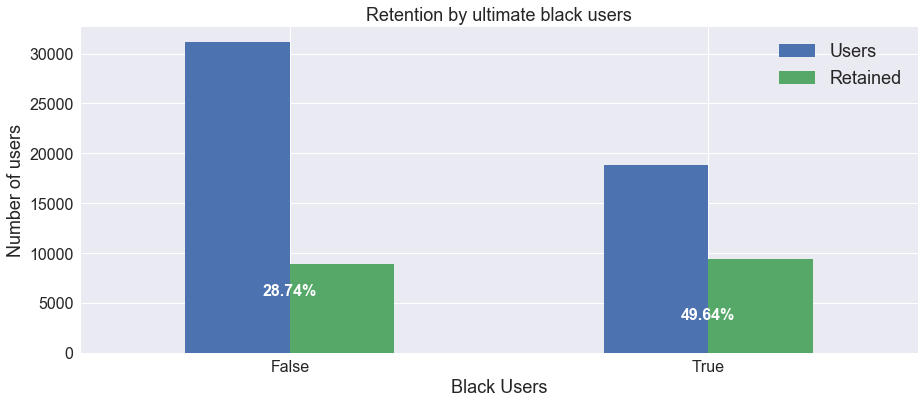

In [788]:
# plot ultimate balck users with the percentage of retained users.
ax = black_users[['Users','Retained']].plot.bar(
                             legend=False, figsize=(15,6), fontsize=16, rot=360)
labels = []
for j in black_users.columns:
    if j=='retained_pct':
        for i in black_users.index:
            label = black_users.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better reading        
labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width, y + height/5, label, ha='center', va='center',
               fontsize=16, fontweight="bold", color="white")
plt.title("Retention by ultimate black users", fontsize=18 )
plt.xlabel("Black Users", fontsize=18)
plt.ylabel("Number of users", fontsize=18)
plt.legend(fontsize=18)
plt.show()

About **37%** of the users took an Ultimate Black in their first 30 days and out of which, about **50%** retained.

In [761]:
ultimate_df.head(2)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0


In [762]:
rating_by_driver_count = ultimate_df.groupby('avg_rating_by_driver')['retained'].agg('count').to_frame().reset_index()
rating_by_driver_sum = ultimate_df.groupby('avg_rating_by_driver')['retained'].agg('sum').to_frame().reset_index()

In [765]:
# rename the column to more relevant name
rating_by_driver_count.rename(columns={'retained':'Users'}, inplace=True)
rating_by_driver_sum.rename(columns={'retained':'Retained'}, inplace=True)

In [767]:
# merger the two dataframe created above: rating_by_driver
rating_by_driver = pd.merge(rating_by_driver_count, rating_by_driver_sum, on='avg_rating_by_driver')
rating_by_driver.head(2)

,avg_rating_by_driver,Users,Retained
0,1.0,181,20
1,1.5,4,1


In [789]:
# add a column 'retained_pct' as the percentage of users and retained users.
rating_by_driver['retained_pct'] = 100*(rating_by_driver['Retained']/rating_by_driver['Users'])
rating_by_driver['retained_pct'] = rating_by_driver['retained_pct'].apply(lambda x: round(x,2))
rating_by_driver.head(2) # make sure we have all the data

,Users,Retained,retained_pct
avg_rating_by_driver,,,
1.0,181,20,11.05
1.5,4,1,25.00


In [790]:
rating_by_driver = rating_by_driver.set_index('avg_rating_by_driver')
rating_by_driver.head(2)

,Users,Retained,retained_pct
avg_rating_by_driver,,,
1.0,181,20,11.05
1.5,4,1,25.00


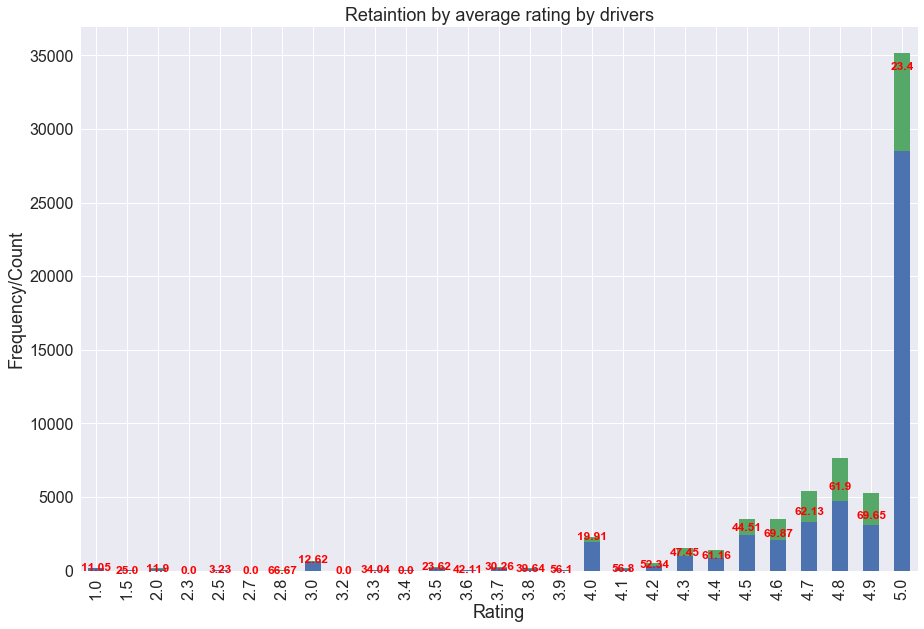

In [1118]:
ax=rating_by_driver[['Users','Retained']].plot.bar(title="Retaintion by average rating by drivers",
                             legend=False, figsize=(15,10), stacked=True, fontsize=16)
labels = []
for j in rating_by_driver.columns:
    if j=='retained_pct':
        for i in rating_by_driver.index:
            label = rating_by_driver.loc[i][j]
            #label = format(label, '.0f')
            labels.append(label)
        
# adding % symbol at the end of the each number for better visualization        
#labels = [str(l) + '%' for l in labels]
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2. , height*1.2 , label, ha='center', va='center',
               fontsize=12, fontweight="bold", color="red")
         
plt.title("Retaintion by average rating by drivers", fontsize=18 )
plt.xlabel("Rating", fontsize=18)
plt.ylabel("Frequency/Count", fontsize=18)
#plt.legend(fontsize=18)
plt.show()

It seems higher ratings by drivers makes the riders happy and the retention of those users have more than **60%** retention rate.

In [842]:
ultimate_df.groupby('retained').mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
retained,,,,,,,,
0,6.188478,4.786945,4.605566,1.075367,8.688548,1.659167,0.299621,60.181597
1,5.118977,4.763190,4.593932,1.073720,9.128165,3.349590,0.511141,62.214604


As we can see at the above table, numerical values and their average for each class(retained=1 or retained=0). For example **average distance** travelled by retained user is less than that of not retained users. **Average rating** by driver and of the driver is almost similar. Similarly with other columns.

### EDA Conclusion ###
* The city of King's Landing can be seen as an opportunity. City has the lowest number of users but highest percentage of retention.
* The primary device of the users doesn't contribute much in finding any relationship between the users and the retention of the users.
* Black users have 50% chance of being retained.
* High rating by drivers to the customers increases the probability of the users to be retained.

-----------------------------------------------------------------------------------------------

## Modeling ##
As we know this is a binary classification problem, where we try to predict that a user will be active in the 6th month or not. In this prediction problem, the retained users will be denoted by **1(TRUE)** and **0(False)** denotes users Ultimate Inc. would loose. Before jumping into the modeling let's start with feature engineering.<br>
### Feature Engineering ###
We have numerical values columns, categorical values column and datetime value columns. Numerical values are good enough for modeling, no more addition engineering is required on it. We will use **OneHotEncoder** for converting categorical values to numerical values. We have two columns with the datetime column which we will drop as both of them are not required. **signup_date** is the date on which the users has signed up for Ultimate Inc services. From the problem statement we know that users were signed in January 2014. And **last_trip_date** column is the date the users has last took ride, since our target value is derived from this column we can drop this column. 

In [1004]:
# import all the required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [831]:
# drop the date time column
ultimate_df.drop(['signup_date','last_trip_date'], inplace=True, axis=1)

In [835]:
# convert all the categorical columns to numericals columns: ultimate_ml
ultimate_ml = pd.get_dummies(ultimate_df, columns=['city','phone','ultimate_black_user'])

In [836]:
# print few rows of the new dataframe
ultimate_ml.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,0,1,0


In [840]:
# get the target column: Y
Y = ultimate_ml[['retained']]

# get all the fetures in X_features
X_features = ultimate_ml.drop('retained', axis=1)

In [844]:
ultimate_ml['retained'].value_counts()

0    31690
1    18310
Name: retained, dtype: int64

Since we have **36.62%** as True class, and **63.38%** data are in False class, so the two classes are not equally distributed and hence we have to take **imbalanced data** into consideration. To handle the imbalabced data we will use **SMOTE** (Synthetic Minority Over-sampling Technique) to generate sythetic sample. And we will consider **confusion matrix, precision, recall, f1, PR-curve, and ROC-Curve** metrices to measure performance of the model.<br>
**ROC-Curve**:ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.<br>
**PR-Curve**: In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).<br>
**Confusion Matrix**: In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another). It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

Let's start by splitting the dataset into train and test data, and then we can SMOTE technique on training dataset for resampling.

In [846]:
# split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X_features, Y, test_size=.3, random_state=42,
                                                   stratify = ultimate_ml['retained'])

In [1006]:
# Resampling of training dataset: sm, X_train_sm, y_train_sm
sm = SMOTE(kind = "regular")
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [1007]:
 # just to make sure we have same number of rows after resampling.
x_train_sm.shape[0] , y_train_sm.shape[0]

(44366, 44366)

We have defined function **PR_And_ROC_Curve** which takes model name as an argument and produces PR and ROC curve graph for visualization.

In [1074]:
def PR_And_ROC_Curve(model_name):
    ''' This function do the required calculaiton and produces PR and ROC-Curve'''
    
    # calculate precision, recall and thresholds: 
    precision, recall, thresholds_pr = precision_recall_curve(y_test, 
                                                        model_name.decision_function(x_test))
    
    # find threshold close to 0 for PR (precision-recall): 
    close_0_pr = np.argmin(np.abs(thresholds_pr))
    
    # calculate fpr(flase positive rate), tpr(true positive rate) and thresholds: 
    fpr, tpr, threshold_roc = roc_curve(y_test, model_name.decision_function(x_test))
    
    # find threshold close to 0 for roc:
    close_0_roc = np.argmin(np.abs(threshold_roc))
    
    # plot PR-Curve
    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(precision[close_0_pr], recall[close_0_pr], 'o', 
         markersize=10, label="Threshold Zero",fillstyle="none", c='k', mew=2)
    plt.plot(precision, recall, label="Precision Recall curve")
    plt.title("PR-Curve", fontsize=16)
    plt.xlabel("Precision", fontsize=16)
    plt.ylabel("Recall", fontsize=16)
    plt.legend(loc="best", fontsize=12)
    
    # plot ROC Curve
    plt.subplot(1,2,2)
    plt.plot(fpr[close_0_roc],tpr[close_0_roc],'o', markersize=10,label="Threshold Zero",
        fillstyle="none", c='k', mew=2)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.title("ROC-Curve", fontsize=16)
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR(Recall)", fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.show()
    
    return

In [1073]:
def PR_And_ROC_Curve2(model_name):
    '''This function is similar to the PR_And_ROC_Curve except that in these function we will 
    be using predict_proba function and the decision_function is only available with Linear
    models.'''
    # calculate precision, recall and thresholds: 
    precision, recall, thresholds_pr = precision_recall_curve(y_test, 
                                                        model_name.predict_proba(x_test)[:,1])
    
    # find threshold close to 0 for PR (precision-recall): 
    close_0_pr = np.argmin(np.abs(thresholds_pr))
    
    # calculate fpr(flase positive rate), tpr(true positive rate) and thresholds: 
    fpr, tpr, threshold_roc = roc_curve(y_test, model_name.predict_proba(x_test)[:,1])
    
    # find threshold close to 0 for roc:
    close_0_roc = np.argmin(np.abs(threshold_roc))
    
    # plot PR-Curve
    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(precision[close_0_pr], recall[close_0_pr], 'o', 
         markersize=10, label="Threshold Zero",fillstyle="none", c='k', mew=2)
    plt.plot(precision, recall, label="Precision Recall curve")
    plt.title("PR-Curve", fontsize=16)
    plt.xlabel("Precision", fontsize=16)
    plt.ylabel("Recall", fontsize=16)
    plt.legend(loc="best", fontsize=12)
    
    # plot ROC Curve
    plt.subplot(1,2,2)
    plt.plot(fpr[close_0_roc],tpr[close_0_roc],'o', markersize=10,label="Threshold Zero",
        fillstyle="none", c='k', mew=2)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.title("ROC-Curve", fontsize=16)
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR(Recall)", fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.show()
    
    return

### LogisticRegression ###
Logistic_regression is linear model and widely used in classification problems. This is our first model.

In [1032]:
# define range of C(regularization) parameter for logistic regression: param_grid
param_grid = {'C': [0.001,0.01,1,10, 100]}

# model with GridSearchCV: logistic
logistic = GridSearchCV(LogisticRegression(),param_grid, cv=10)

In [1033]:
# train the model
logistic.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1034]:
# print the best parameter and best score for the training dataset
print("Best Parameter:", logistic.best_params_)
print("Best score:",logistic.best_score_)

Best Parameter: {'C': 100}
Best score: 0.707163142947


In [1045]:
# prediction on the test data: y_pred_lr_clf 
y_pred_lr_clf = logistic.predict(x_test)

### Model Evaluation - Logistic Regression

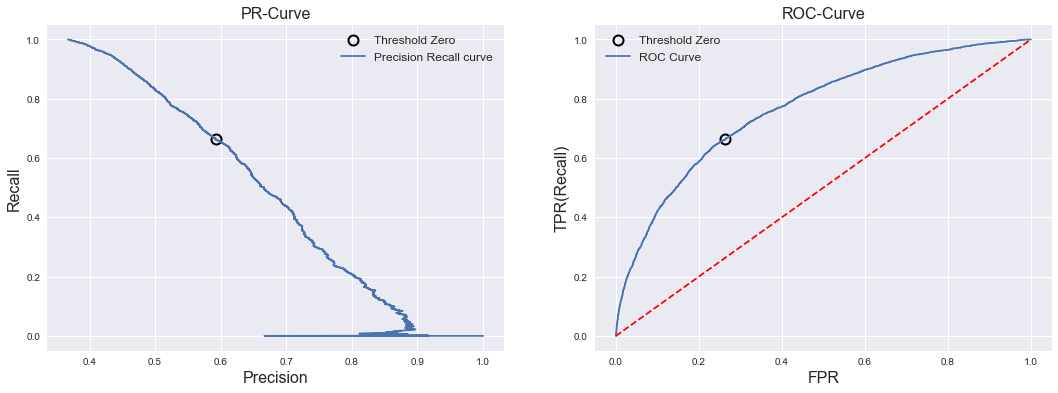

In [1075]:
# Plot PR and ROC curve. 
PR_And_ROC_Curve(logistic)

In [1047]:
# confusion Matrix: cm_lr_clf
cm_lr_clf = confusion_matrix(y_test, y_pred_lr_clf)
print("The Confusion Matrix for LogisticRegression:\n",cm_lr_clf )

The Confusion Matrix for LogisticRegression:
 [[7003 2504]
 [1854 3639]]


In [1048]:
# print classification report
print(classification_report(y_test, y_pred_lr_clf))

             precision    recall  f1-score   support

          0       0.79      0.74      0.76      9507
          1       0.59      0.66      0.63      5493

avg / total       0.72      0.71      0.71     15000



In [1049]:
# print ROC AUC score for the model. 
roc_auc_lr_clf = roc_auc_score(y_test, logistic.decision_function(x_test))
print("The ROC AUC Sore:", roc_auc_lr_clf)

The ROC AUC Sore: 0.768361498022


In [1050]:
# calculation of average precision value: ap_lr_clf
ap_lr_clf = average_precision_score(y_test, logistic.decision_function(x_test))
print("Average Precision for LogisticRegression:", ap_lr_clf)

Average Precision for LogisticRegression: 0.660503295552


In [1051]:
# Calculate the f1_score for the Linear model: f1_score_lr_clf# Calcula 
f1_score_lr_clf = f1_score(y_test, y_pred_lr_clf)
print("The f1 score for the LosgisticRegression model:", f1_score_lr_clf)

The f1 score for the LosgisticRegression model: 0.625472671021


### Random Forest ###
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [1052]:
# define hyper-parameters for the random forest clasifier: param_grid
param_grid = {'n_estimators': [5,10,100], 'max_depth':[5,10,20]}

# model with GridSearchCV: lr_clf
rf = GridSearchCV(RandomForestClassifier(),param_grid, cv=10)

In [1053]:
rf.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'max_depth': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1054]:
# print out the best parameters and best score on training data
print("Best Parameters:",rf.best_params_)
print("Best Score:",rf.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best Score: 0.816097912816


In [1055]:
# prediction using the model on test data: y_pred_rf
y_pred_rf = rf.predict(x_test)

### Model Evaluation - Random Forest### 

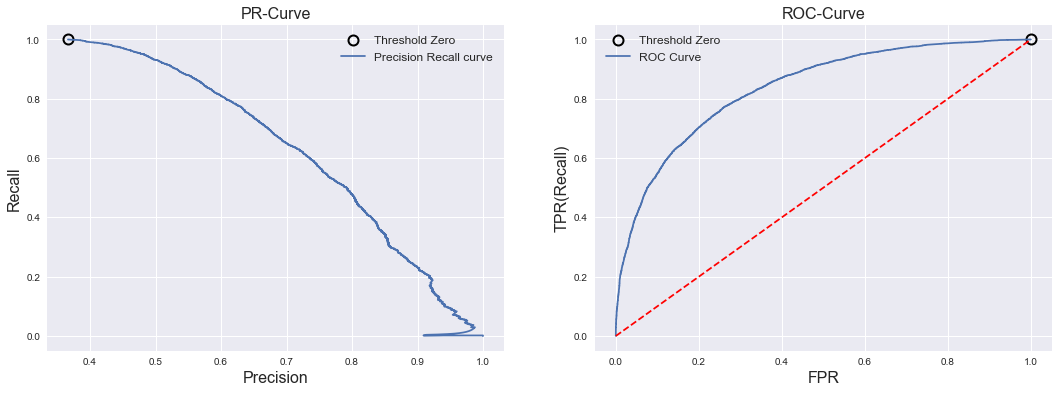

In [1076]:
# plot the PR and ROC curve for the random forest classifier
PR_And_ROC_Curve2(rf)

In [1064]:
# confusion Matrix for the random forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("The confusion matrix for Random Forest:\n", cm_rf)

The confusion matrix for Random Forest:
 [[7757 1750]
 [1757 3736]]


In [1065]:
# print classification report which has summary for precision, recall and f1 score.
print(classification_report(y_test, y_pred_rf))

             precision    recall  f1-score   support

          0       0.82      0.82      0.82      9507
          1       0.68      0.68      0.68      5493

avg / total       0.77      0.77      0.77     15000



In [1066]:
# calulate the average precision score for random forest: ap_rf
ap_rf = average_precision_score(y_test, rf.predict_proba(x_test)[:,1])
print("The average precision score for RandomForest is:", ap_rf)

The average precision score for RandomForest is: 0.758455450584


In [1067]:
# print ROC AUC acore for the model.
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])
print("The ROC AUC Sore:", roc_auc_rf)

The ROC AUC Sore: 0.837113534881


In [1068]:
f1_score_rf = f1_score(y_test, y_pred_rf)
print("The f1 score for the RandomForest model:", f1_score_rf)

The f1 score for the RandomForest model: 0.680572001093


## Gradiant Boosting ##
Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

In [1078]:
# GridSearch for best hyper-parameters: gbc
param_grid = {'n_estimators': [5,10,100], 'max_depth':[1,5,10], 'learning_rate': [0.1,1]}
gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

In [1079]:
# train the model
gbc.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'max_depth': [1, 5, 10], 'learning_rate': [0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1080]:
# print out the best parameters and best score on training data
print("Best Parameters:",gbc.best_params_)
print("Best Score:",gbc.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Score: 0.816481089122


In [1081]:
# prediction using the model on test data: y_pred_gbc
y_pred_gbc = gbc.predict(x_test)

### Model Evaluation - Gradient Boosting ### 

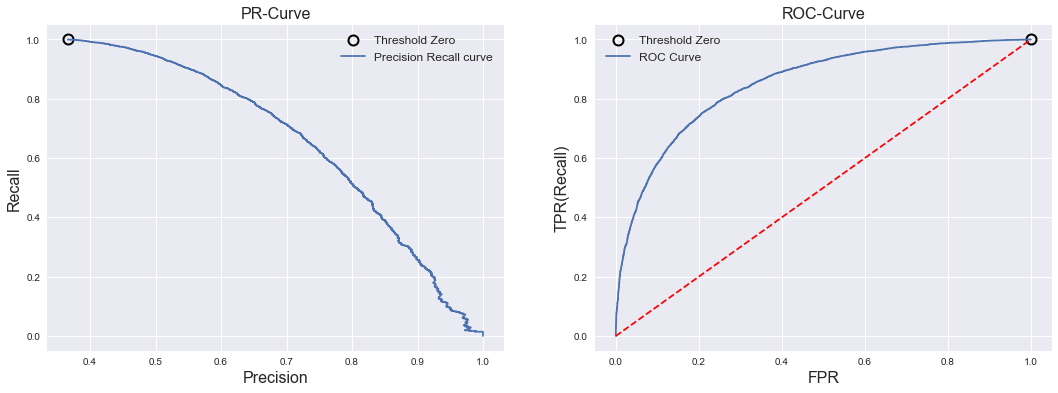

In [1082]:
# plot the PR and ROC curve for the gradient boosting classifier
PR_And_ROC_Curve2(gbc)

In [1084]:
# confusion Matrix for the random forest model: cm_gbc
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print("The confusion matrix for Gradient Boosting:\n", cm_gbc)

The confusion matrix for Gradient Boosting:
 [[8070 1437]
 [1760 3733]]


In [1085]:
# print classification report which has summary for precision, recall and f1 score.
print(classification_report(y_test, y_pred_gbc))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83      9507
          1       0.72      0.68      0.70      5493

avg / total       0.78      0.79      0.79     15000



In [1086]:
# calulate the average precision score for gradient boosting: ap_gbc
ap_gbc = average_precision_score(y_test, gbc.predict_proba(x_test)[:,1])
print("The average precision score for gradient boosting is:", ap_gbc)

The average precision score for gradient boosting is: 0.777692031004


In [1087]:
# print ROC AUC acore for the model: roc_auc_gbc
roc_auc_gbc = roc_auc_score(y_test, gbc.predict_proba(x_test)[:,1])
print("The ROC AUC Sore:", roc_auc_gbc)

The ROC AUC Sore: 0.852056446531


In [1088]:
# print F1 score of gradient boosting: f1_score_gbc
f1_score_gbc = f1_score(y_test, y_pred_gbc)
print("The f1 score for the GradientBoosting model:", f1_score_gbc)

The f1 score for the GradientBoosting model: 0.700178186252


From the above modeling and evaluation of all the models, we can conclude that **Gradient Boosting** classifier has outperformed all other models convincingly. All the performance metrics has produced the best score for gradient boosting.<br>
**Confusion Matrix:** model was able to predict about **78%** of the classes correctly.<br>
**PR and ROC Curve:** model's curve are much smoother than other models. Also the ROC Curve is much closer to top left corner, means more area under the curve (AUC).<br>
Similarly other scores like **ROC AUC**, **average precision** and **F1** are better than other models.

Hence we should use this model for predicting if the users will be retained or not as a valuable customer of Ultimate Inc.

In [1093]:
# features and their importance: feature_imp
feature_imp = gbc.best_estimator_.feature_importances_

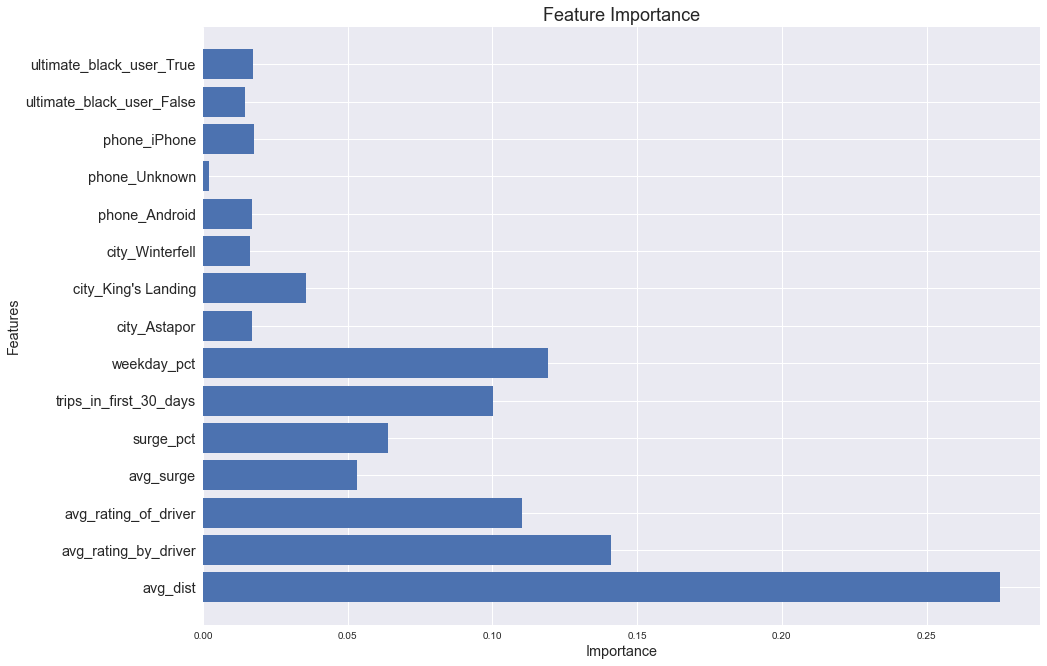

In [1098]:
# Plot feature importance bar graph for better visualization.
n_features = x_train_sm.shape[1]
feature_names = X_features.columns
plt.figure(figsize=(15, 11))
plt.barh(range(n_features), feature_imp)
plt.yticks(np.arange(n_features), feature_names, fontsize='large')
plt.ylabel('Features', fontsize='large')
plt.xlabel('Importance', fontsize='large')
plt.ylim(-1, n_features)
plt.title("Feature Importance", fontsize=18)
plt.show()

As we can see that 5 top feature contributing to the prediction are **avg_dist, avg_rating_by_driver, weekday_pct, avg_rating_of_driver** and **trip_in_first_30_days**.

### Conclusion ###
* From this model Gradient Boosting, Ultimate Inc. can focus on at least top 5 features contributing to the prediction. For example if an user is active in the first 30 days can be given some offer or rebate on next ride.
* As mentioned in EDA part that the city of King's Landing is good opportunity to increase the number of users by bringing some discount to the city, keep in mind the retention of city is very high compared to the other cities, so once a user signup in King's Landing there is more than **60%** chance that he will be retained.
